# Input Data Insurance

In [69]:
import pandas as pd
data = pd.read_csv("/content/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Duplikat Data

In [70]:
# Mengecek data duplikat
def check_duplicates(data, table_name):
    duplicate_count =data.duplicated().sum()
    print(f"\n--- Pengecekan Duplikat pada Tabel {table_name} ---")
    if duplicate_count > 0:
        print(f"Tabel {table_name} memiliki {duplicate_count} data duplikat.")
    else:
        print(f"Tabel {table_name} tidak memiliki data duplikat.")
    return duplicate_count

print ('Hasil Pengecekan Duplikat')

check_duplicates(data, "data")

Hasil Pengecekan Duplikat

--- Pengecekan Duplikat pada Tabel data ---
Tabel data memiliki 1 data duplikat.


1

In [71]:
duplikat = data[data.duplicated()]
print("\nData Duplikat:")
print(duplikat)


Data Duplikat:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [72]:
# Menghapus duplikat
data = data.drop_duplicates()

print("\nData Setelah Menghapus Duplikat:")
print(data)


Data Setelah Menghapus Duplikat:
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


# Missing Values

In [73]:
# Pengecekan terhadap NaN atau Missing Value
missing_values = data.isnull().sum()
descriptive_stats = data.describe()
data.types = data.dtypes
missing_values, descriptive_stats, data.types

<ipython-input-73-5f95eafcd4b4>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.types = data.dtypes


(age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
                age          bmi     children       charges
 count  1337.000000  1337.000000  1337.000000   1337.000000
 mean     39.222139    30.663452     1.095737  13279.121487
 std      14.044333     6.100468     1.205571  12110.359656
 min      18.000000    15.960000     0.000000   1121.873900
 25%      27.000000    26.290000     0.000000   4746.344000
 50%      39.000000    30.400000     1.000000   9386.161300
 75%      51.000000    34.700000     2.000000  16657.717450
 max      64.000000    53.130000     5.000000  63770.428010,
 age           int64
 sex          object
 bmi         float64
 children      int64
 smoker       object
 region       object
 charges     float64
 dtype: object)

In [74]:
#Statistika deskriptif data

data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [75]:
# Memeriksa tipe data dari variabel
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# Outliers

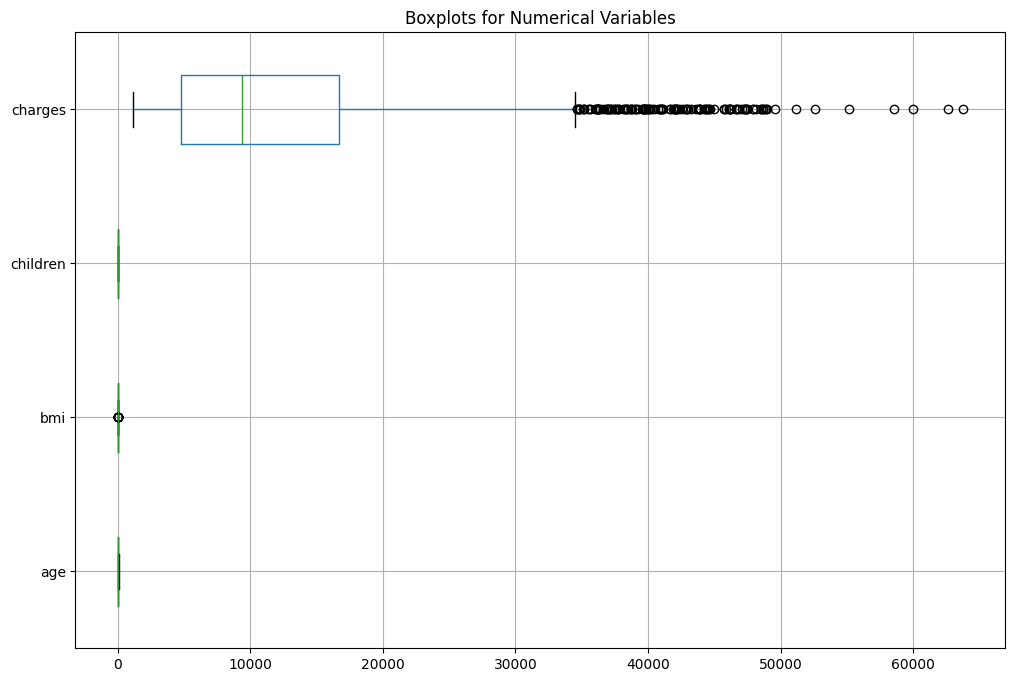

In [76]:
numerical_columns = data.select_dtypes(include=[float, int]).columns
data[numerical_columns].boxplot(figsize=(12, 8), vert=False)
plt.title('Boxplots for Numerical Variables')
plt.show()

In [77]:
# Variabel Kategorik
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['sex', 'smoker', 'region'], dtype='object')

<ipython-input-78-a91e32ca4fa5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=column, y='charges', palette='Set3')


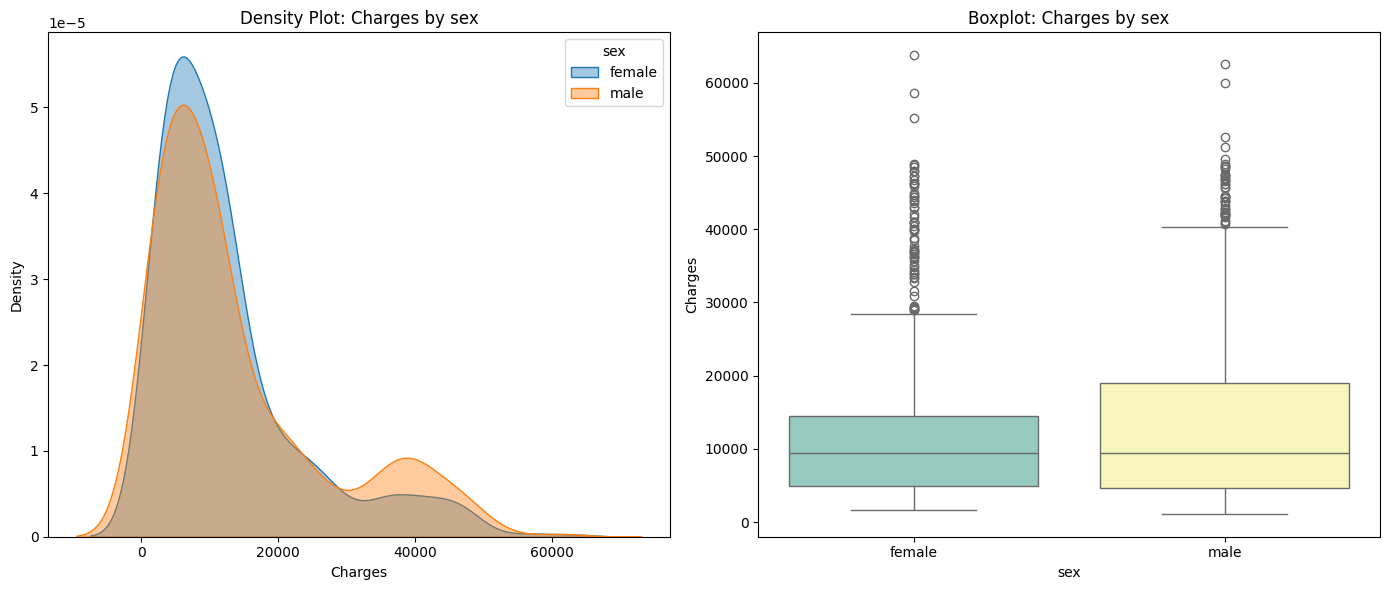

<ipython-input-78-a91e32ca4fa5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=column, y='charges', palette='Set3')


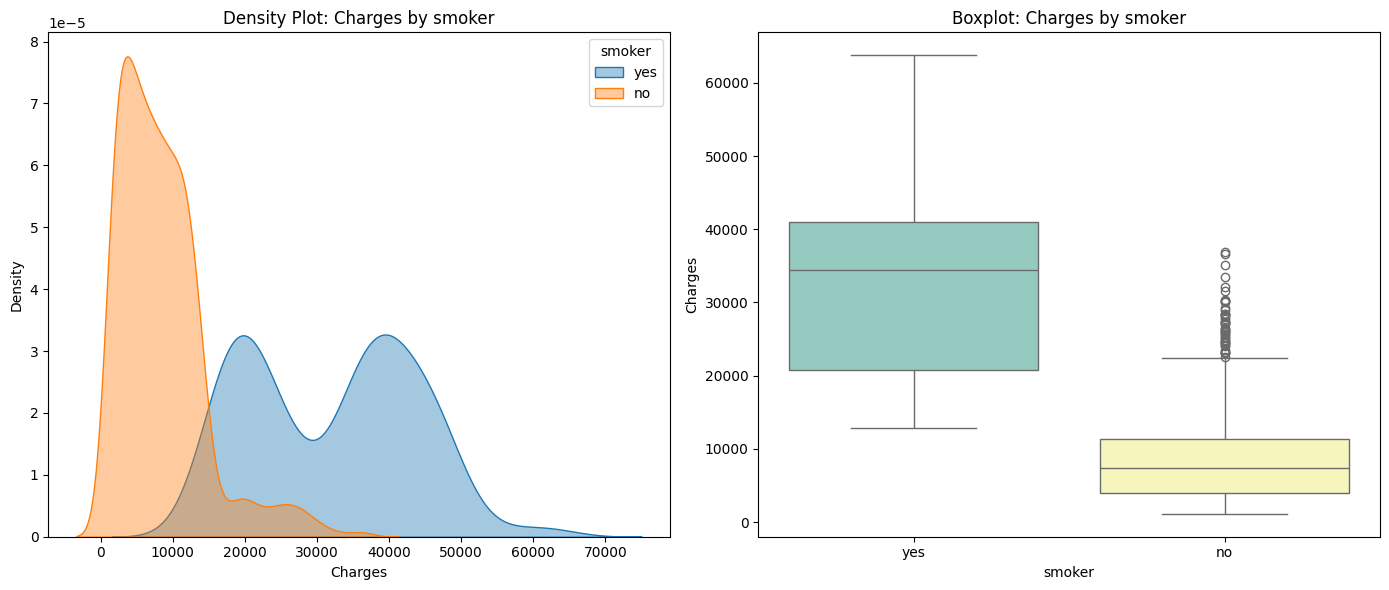

<ipython-input-78-a91e32ca4fa5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=column, y='charges', palette='Set3')


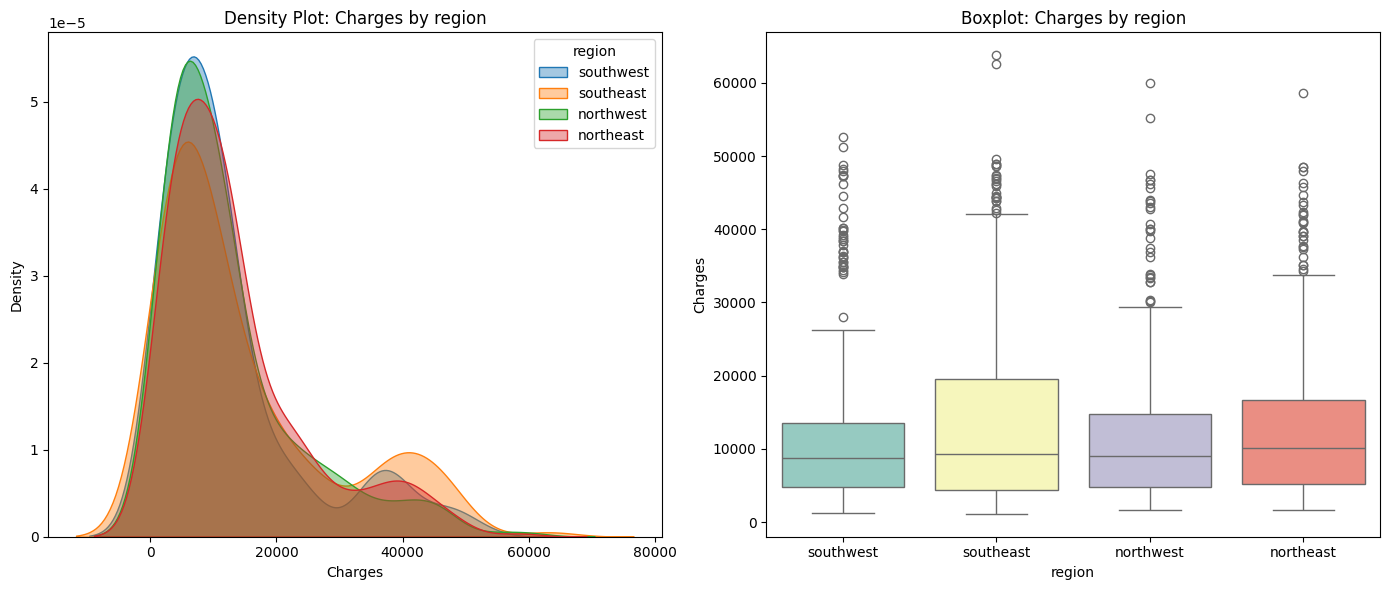

In [78]:
# Loop untuk setiap variabel kategorik
for column in categorical_columns:
    plt.figure(figsize=(14, 6))

    # Density plot expenses berdasarkan kategori
    plt.subplot(1, 2, 1)
    for category in data[column].unique():
        sns.kdeplot(data=data[data[column] == category],
                    x='charges',
                    label=category,
                    fill=True,
                    alpha=0.4)
    plt.title(f'Density Plot: Charges by {column}')
    plt.xlabel('Charges')
    plt.ylabel('Density')
    plt.legend(title=column)

    # Boxplot expenses berdasarkan kategori
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, x=column, y='charges', palette='Set3')
    plt.title(f'Boxplot: Charges by {column}')
    plt.xlabel(column)
    plt.ylabel('Charges')

    plt.tight_layout()
    plt.show()

# PAIR PLOT DAN HEATMAP MATRIKS KORELASI

In [79]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


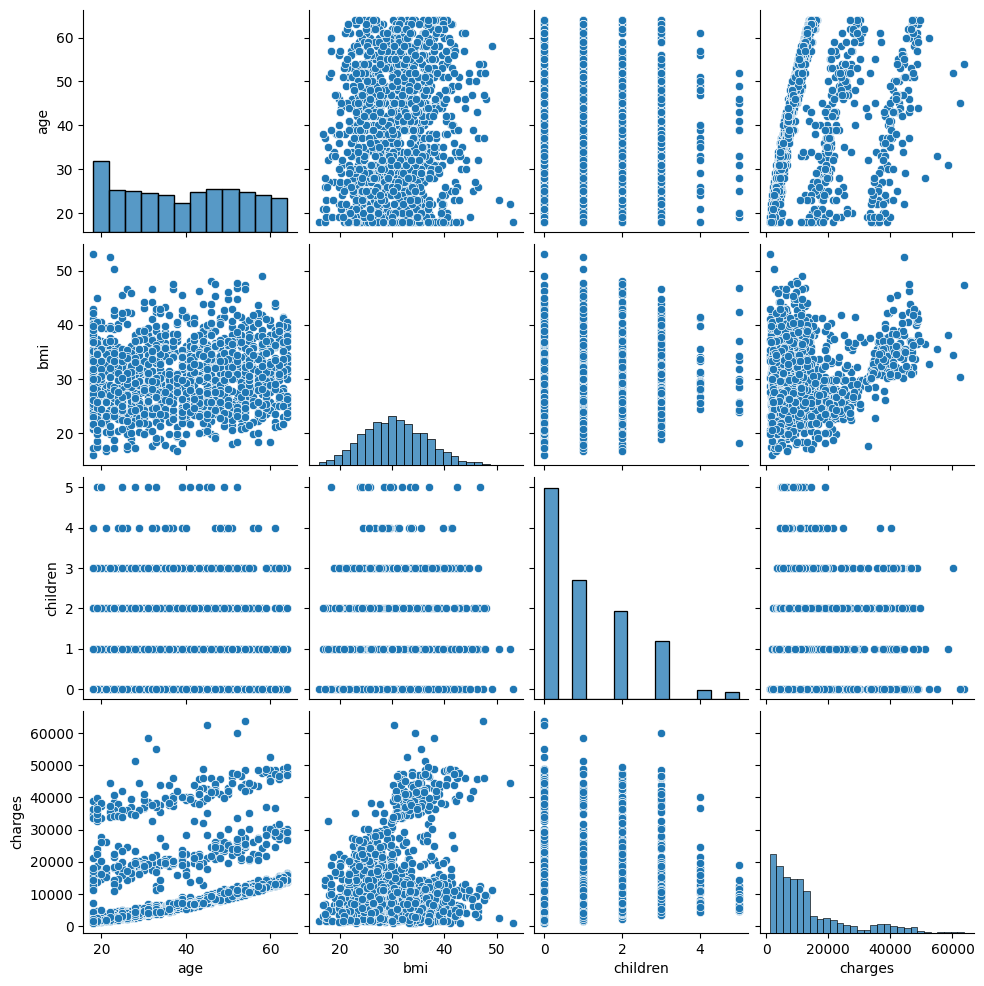

In [82]:
sns.pairplot(data)
plt.show()

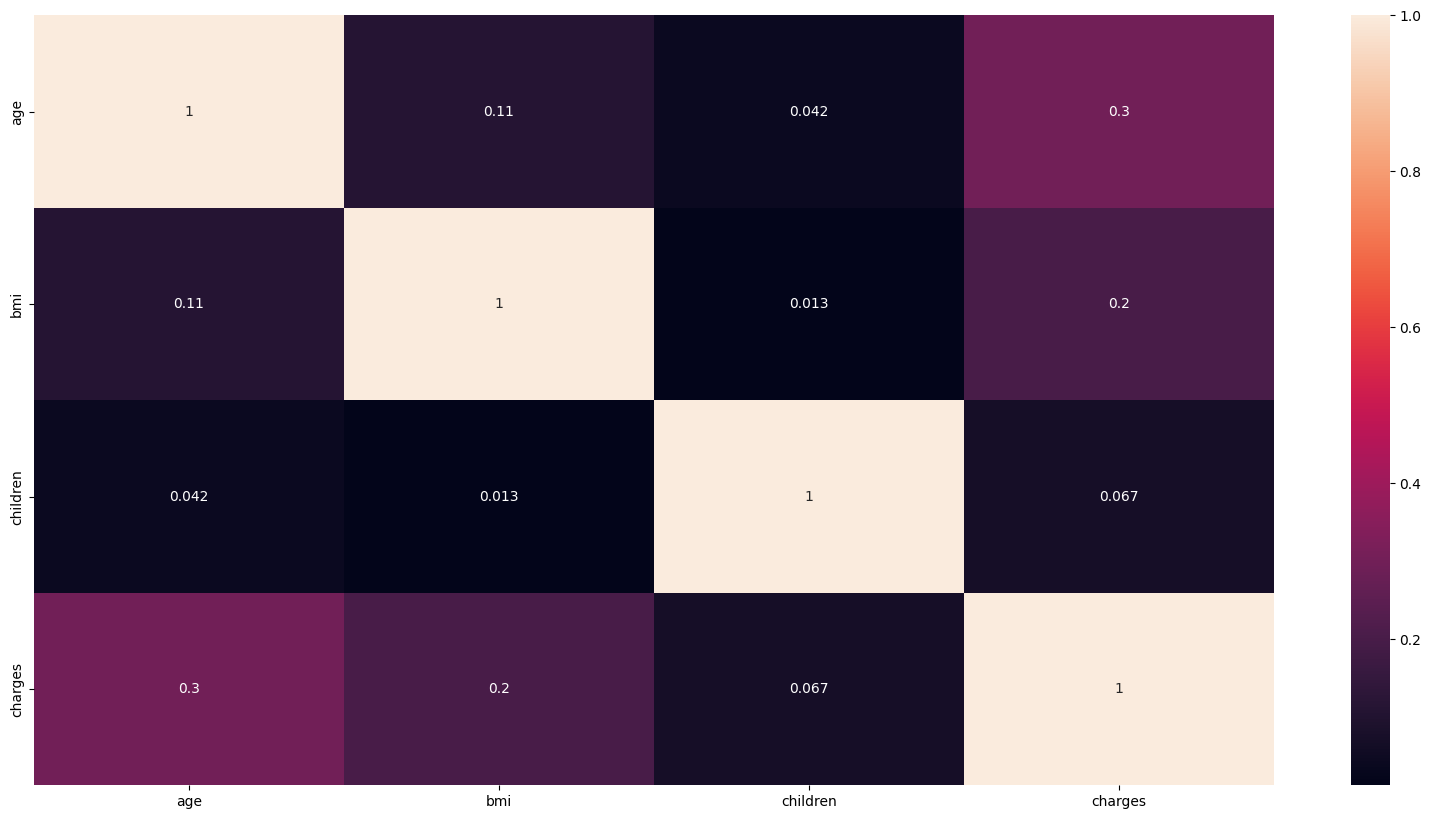

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi antar variabel numerik
plt.figure(figsize=(20, 10))

# Select only numerical features for correlation calculation
numerical_features = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numerical_features].corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
import pandas as pd

data.to_csv('data_new.csv', index=False)
print("File berhasil disimpan!")

from google.colab import files
files.download('data_new.csv')

File berhasil disimpan!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>